## note

SGDClassifier와 SGDRegressor는 확률적 경사 하강법을 사용하여 다양한 선형 모델을 훈련합니다.

SGDClassifier의 loss 기본값은 힌지 손실인 'hinge'이며 서포트 벡터 머신 모델을 훈련합니다.

'loss'를 'log'로 지정하면 로지스틱 회귀 모델을 훈련합니다.(1.3 버전에는 'log'가 'log_loss'로 바뀔 예정입니다.)

SGDRegressor의 loss 기본값은 'squared_error'로 릿지 모델을 훈현합니다.
'squared_error'와 같은 의미인 'squared_loss'는 1.2버전에 삭제됩니다.

SGDClassifier와 SGDRegressor의 penalty 매개변수에는 'l1','l2','elasticnet'을 지정 가능하며 기본값은 'l2'입니다. 

두 클래스의 규제 강도는 모두 alpha 매개변수로 조정하며 alpha 매개변수의 기본값은 0.0001이며 값이 클수록 규제 강도가 높아집니다.

알고리즘 반복 횟수는 max_iter 매개변수로 지정하며 기본값은 1000입니다. 

0.20버전에서 조기 종료를 위한 ealry_stopping 매개변수가 추가되었습니다. 이 매개변수의 기본값은 False로 n_iter_no_change(기본값 5)에 지정한 반복 동안 훈련 세트가 적어도 tol(기본값 le-3)에 지정한 값 만큼 향상되지 않으면 훈련을 종료합니다. 이 매개변수를 True로 지정하면 훈련 데이터에서 validation_fraction(기본값 0.1)에 지정한 비율만큼 검증 데이터로 사용하여 n_iter_no_change 반복 동안 검증 점수가 적어도 tol값보다 향상되지 않으면 훈련을 종료합니다. 실제 반복 횟수는 n_iter 속성에 저장되어 있습니다.

확률적 경사 하강법의 학습률은 'learning_rate' 매개변수로 지정합니다. 기본값은 'optimal'로 반복횟수에 따라 비례적으로 감소합니다. 'constant'는 eta0에서 시작하여 지정한 값을 사용합니다 eta0의 기본값은 0입니다.
'invscaling'은 eta0에서 시작하여 지수적으로 감소합니다. 0.20 버전에서 추가된 'adaptive'는 eta0에 지정한 값에서 시작하여 조기 종료 조건이 될 때 마다 5배씩 줄이며 학습율이 le-6보다 작아지면 알고리즘을 종료합니다.

확률적 경사 하강법의 장점은 대용량 데이터에 사용할 수 있고 속도가 빠르다는 것입니다. 단점으로는 튜닝할 하이퍼파라미터가 많고 특성 스케일에 민감합니다.

SGDclassifier는 n-jobs 매개변수에 OVA 다중 분류를 병렬화 하기 위해 사용할 CPU 코어 개수를 지정할 수 있습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier,SGDRegressor

# SGDClassifier

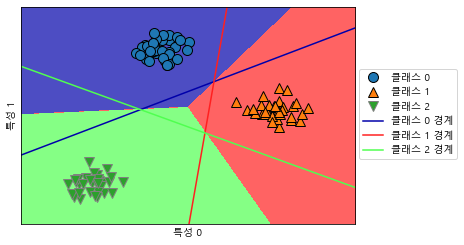

In [2]:
x,y = make_blobs(random_state=42)

sgd_c = SGDClassifier(alpha=0.01,learning_rate='adaptive',eta0=0.1,random_state=42,n_jobs=-1)
sgd_c.fit(x,y)
mglearn.plots.plot_2d_classification(sgd_c,x,fill=True,alpha=.7)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(sgd_c.coef_,sgd_c.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

# SGDRegressor

In [3]:
x,y = mglearn.datasets.load_extended_boston()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive',eta0=0.1,random_state=42)
sgd_r.fit(x_train,y_train)

print('훈련 세트 점수 : {:.2f}'.format(sgd_r.score(x_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(sgd_r.score(x_test,y_test)))

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.77


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i